In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Data_for_Values_1.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,20000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [4]:
df_new = df[['Age', 'Salary']]

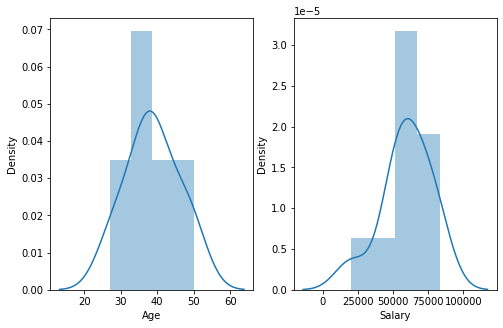

In [5]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.show()

In [ ]:
# không phải phân phối chuẩn ==> không sử dụng StandardScaler

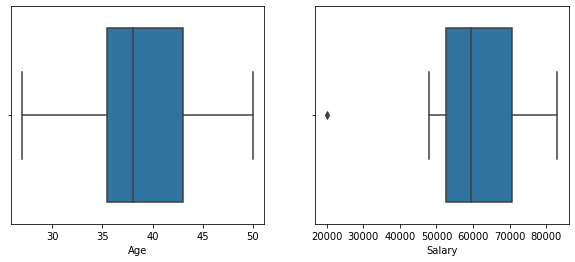

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.show()

In [7]:
# Có outlier ==> không sử dụng MinMaxScaler
# ==> sử dụng RobustScaler
from sklearn.preprocessing import RobustScaler

In [8]:
scaler = RobustScaler()

In [9]:
df_scale = scaler.fit_transform(df_new)
df_scale = pd.DataFrame(df_scale, columns=df_new.columns)
df_scale

,Age,Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-2.164384
5,-0.400000,-0.082192
6,0.000000,-0.410959
7,1.333333,1.068493
8,1.600000,1.287671
9,-0.133333,0.410959


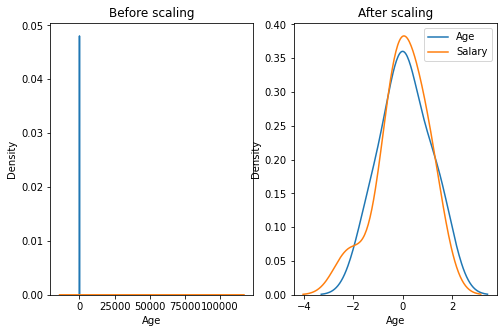

In [13]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8,5))
ax1.set_title('Before scaling')
sns.kdeplot(df_new['Age'], ax=ax1, label='Age')
sns.kdeplot(df_new['Salary'], ax=ax1, label='Salary')
ax2.set_title('After scaling')
sns.kdeplot(df_scale['Age'], ax=ax2, label='Age')
sns.kdeplot(df_scale['Salary'], ax=ax2, label='Salary')
plt.legend()
plt.show()

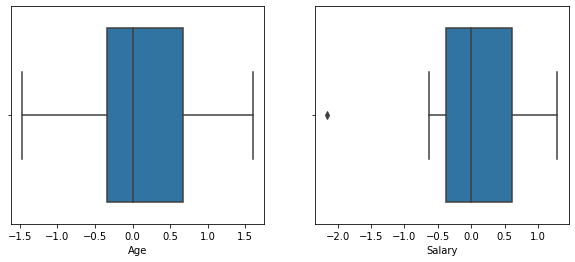

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df_scale['Age'])
plt.subplot(1,2,2)
sns.boxplot(df_scale['Salary'])
plt.show()

In [15]:
print('Before scaling:')
df_new.corr()

Before scaling:


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [16]:
print('After scaling:')
df_scale.corr()

After scaling:


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [ ]:
# StandardScaler ==> MinMaxScaler ==> RobustScaler